In [23]:
# ========================
# 1. Load Dataset
# ========================

import pandas as pd
df = pd.read_csv("customer_reviews.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (400, 2)


,review,sentiment
0,Absolutely love this product! It exceeded my e...,1
1,This is the best purchase I've ever made.,1
2,Fantastic quality and great customer service.,1
3,I am very happy with this item.,1
4,Everything about this product is amazing!,1


In [24]:
# ========================
# 2. Download Stopwords
# ========================


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [25]:
# ========================
# 3. Import Libraries
# ========================
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [26]:
# ========================
# 4. Text Preprocessing
# ========================

def clean_text(text):
    """
    Basic text cleaning:
    - lowercase
    - remove punctuation
    - remove numbers
    - remove extra spaces
    - remove stopwords
    """
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    text = " ".join(words)
    return text

df['cleaned_review'] = df['review'].astype(str).apply(clean_text)

In [27]:
# ========================
# 5. Train-Test Split
# ========================
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train Size:", X_train.shape)
print("Test Size:", X_test.shape)


Train Size: (320,)
Test Size: (80,)


In [28]:
# ========================
# 6. TF-IDF Vectorization
# ========================

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

TF-IDF shape: (320, 95)


In [29]:
# ========================
# 8. Model Evaluation
# ========================

y_pred = model.predict(X_test_tfidf)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


In [30]:
# ========================
# 7. Logistic Regression Model
# ========================

model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [31]:
# Classification Report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



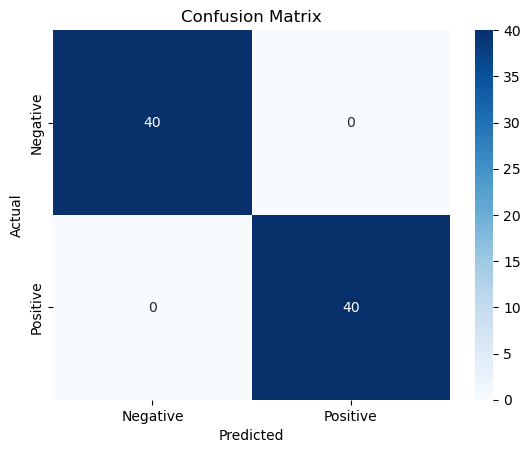

In [32]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Negative', 'Positive'],
    yticklabels=['Negative', 'Positive']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# ========================
# 9. Testing on Custom Input
# ========================

while True:
    test_review = input("Enter the sentence (type 'exit' to quit): ")
    if test_review.lower() == "exit":
        print("Exiting sentiment tester.")
        break
    else:
        test_review_clean = clean_text(test_review)
        test_review_tfidf = tfidf.transform([test_review_clean])  # wrap in list
        prediction = model.predict(test_review_tfidf)[0]
        sentiment = "Positive" if prediction == 1 else "Negative"
        print(f"Prediction: {sentiment}\n")

Enter the sentence (type 'exit' to quit):  i am happy


Prediction: Positive



Enter the sentence (type 'exit' to quit):  i am sad


Prediction: Negative



Enter the sentence (type 'exit' to quit):  exit


Exiting sentiment tester.
